In [3]:
Using Pandas for Data Analysis

<class 'SyntaxError'>: invalid syntax (<ipython-input-3-7b9ced692683>, line 1)

In [4]:
Learning main Pandas features for data analysis.

<class 'SyntaxError'>: invalid syntax (<ipython-input-4-2b9aa2389450>, line 1)

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')
93889
Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135

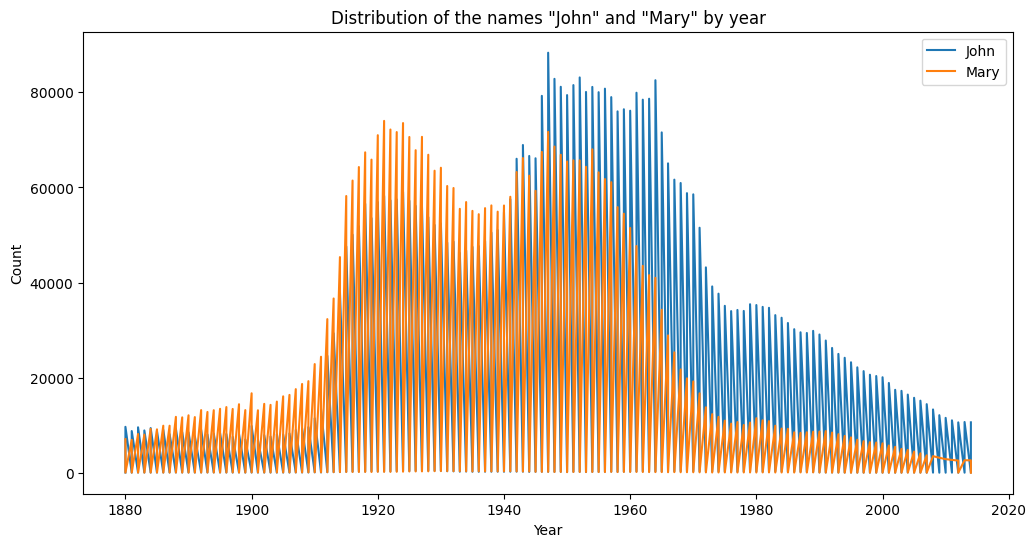

In [2]:
import pandas as pd

# 1
df = pd.read_csv('NationalNames.csv')
print(df.head(8))

# 2
print(df.tail(8))

# 3
print(df.columns)

# 5
unique_names_count = df['Name'].nunique()
print(unique_names_count)

# 10
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print(unique_names_per_year)

# 11
year_with_most_unique_names = unique_names_per_year.idxmax()
print({year_with_most_unique_names})

# 12
most_popular_name_2008 = df[df['Year'] == year_with_most_unique_names].groupby('Name')['Count'].sum().idxmax()
print(most_popular_name_2008)

# 13
most_popular_jacob_female_year = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum().idxmax()
most_popular_jacob_female_data = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F') & (df['Year'] == most_popular_jacob_female_year)]
print(most_popular_jacob_female_data.to_string(index=False))

# 14
unisex_names_per_year = df.groupby(['Year', 'Name'])['Gender'].nunique().eq(2).groupby('Year').sum()
year_most_unisex_names = unisex_names_per_year.idxmax()
count_most_unisex_names = unisex_names_per_year.max()
print(year_most_unisex_names, count_most_unisex_names)

# 15
total_births_per_year = df.groupby('Year')['Count'].sum()
print(total_births_per_year)

# 16
year_with_most_births = total_births_per_year.idxmax()
print(year_with_most_births)

# 17
gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_counts_per_year)

# 18
years_more_girls_than_boys = (gender_counts_per_year['F'] > gender_counts_per_year['M']).sum()
print(years_more_girls_than_boys)

# 21
boys_named_barbara_count = (df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count']).sum()
print(boys_named_barbara_count)

# 22
observation_years_count = df['Year'].nunique()
print(observation_years_count)

# 23
unisex_names = df.groupby('Name')['Gender'].nunique().eq(2).index
unisex_names_counts = df[df['Name'].isin(unisex_names)].groupby('Name')['Count'].sum().sort_values(ascending=False).reset_index().head(15)
print(unisex_names_counts)

# 24
min_count = df['Count'].min()
min_count_names = df[df['Count'] == min_count]['Name']
max_count_per_name = df.groupby('Name')['Count'].max()
max_count_min_count_names = max_count_per_name[min_count_names]
max_count_name = max_count_min_count_names.idxmax()
max_count_value = max_count_min_count_names.max()

print(f'{max_count_name} is the most popular unpopular name. This name was given to babies {max_count_value} times maximum')

# 26
import matplotlib.pyplot as plt

john_data = df[df['Name'] == 'John']
mary_data = df[df['Name'] == 'Mary']

plt.figure(figsize=(12, 6))
plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of the names "John" and "Mary" by year')
plt.legend()
plt.show()